In [97]:
# ВСЕ САМОЕ НЕОБХОДИМОЕ
import numpy as np         # библиотека для матриц и математики
import pandas as pd        # библиотека дл работы с табличками
from scipy import stats    # модуль для работы со статистикой
from scipy.stats import norm

# библиотеки для визуализации и картинок
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

plt.style.use('ggplot')    # можно выбрать для графиков свой любимый стиль
%matplotlib inline 
sns.set_theme(style="darkgrid", palette="pastel")

import random
import math

import itertools
from itertools import combinations
from datetime import datetime

# все необходимое для парсинга
import requests
from requests import get

from selenium import webdriver #для обхода ошибки 403
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait # для того, чтобы мешающаяся реклама, появляющаяся не сразу, закрывалась нажатием не сразу
from selenium.webdriver.support import expected_conditions as EC

from bs4 import BeautifulSoup #обработка html

import warnings
warnings.filterwarnings("ignore")


### ***Достаем табличку с основной информацией по Bitcoin Futures CME***


##### Первый этап: работаем со страницей investing.com

In [372]:
page_link='https://www.investing.com/crypto/bitcoin/bitcoin-futures-historical-data'

In [373]:
browser = webdriver.Chrome()
# https://pypi.org/project/selenium/
# https://www.youtube.com/watch?v=WePyfXrpdDQ&list=PLCf-cQCe1FRyB5Z3tTWHh-1CLKVYfJdkN&index=10
browser.get(page_link)


In [100]:
# Ожидание появления кнопки на странице
#wait = WebDriverWait(browser, 20) # https://stackoverflow.com/questions/59130200/selenium-wait-until-element-is-present-visible-and-interactable
#button = wait.until(EC.presence_of_element_located((By.XPATH, '/html/body/div[7]/div[2]/i')))
# Ожидание кликабельности кнопки
#wait.until(EC.element_to_be_clickable((By.XPATH, "/html/body/div[7]/div[2]/i")))
#button.click()

In [374]:
# Получаем даты начала и конца периода введенные пользователем
start_date = "01-01-2018"
end_date = "04-28-2023"

In [376]:
date_picker=browser.find_element(By.XPATH, '/html/body/div[5]/section/div[8]/div[3]/div/div[1]/div[1]/div').click() #нажимаем на кнопку выбора даты
# https://ru.stackoverflow.com/questions/920268/message-no-such-element-unable-to-locate-element
# https://runebook.dev/ru/docs/dom/htmlelement/click
# https://stackoverflow.com/questions/35632810/python-selenium-find-element-by-name

In [377]:
date_picker_1=browser.find_element(By.XPATH, '/html/body/div[9]/div[1]')

In [378]:
start_date_input = browser.find_element(By.XPATH, '/html/body/div[9]/div[1]/input[1]') # находим элемент начальной даты на странице
start_date_input.clear()  # очищаем его содержимое
start_date_input.send_keys(start_date)  # вводим начальную дату

end_date_input = browser.find_element(By.XPATH, '/html/body/div[9]/div[1]/input[2]')  # находим элемент конечной даты на странице
end_date_input.clear()  # очищаем его содержимое
end_date_input.send_keys(end_date)  # вводим конечную дату

apply_bottom = browser.find_element(By.XPATH, '/html/body/div[9]/div[5]/a').click() #нажимаем на кнопку применения выбранного временного диапазона


##### Второй этап:  достаем таблицу

In [109]:
# Собираем информацию по тэгу 
btc_ftrs_table = browser.find_element(By.XPATH, '/html/body/div[5]/section/div[9]/table[1]') # https://idatica.com/blog/parsing-tablitsy-s-sayta-na-python-poshagovoye-rukovodstvo/
btc_ftrs_table_text=btc_ftrs_table.text

In [111]:
file = open('btc_table.txt', "w")
file.write(btc_ftrs_table_text); #закидываем текст в текстовый файл

In [112]:
with open("btc_table.txt", "r") as file:
    text = file.read()
text = text.replace(",", "")
with open("btc_table.txt", "w") as file:
    file.write(text)

In [113]:
with open("btc_table.txt", "r") as file:
    lines = file.readlines()

new_lines = [lines[0]] # первую строку оставляем без изменений
for line in lines[1:]:
    new_line = line.replace(" ", "-", 2) # заменяем первые два пробела на "-", чтобы сделать дату одним целым
    new_lines.append(new_line)

with open("btc_table.txt", "w") as file:
    file.writelines(new_lines)


In [114]:
with open("btc_table.txt", "r") as file:
    text = file.read()
    
text = text.replace(" ", ",") # заменяем все нужные пробелы на запятые, чтобы потом был нормальные csv-файл с разделителем в виде запятой

with open("btc_table.txt", "w") as file:
    file.write(text)

In [115]:
df = pd.read_csv('btc_table.txt')

In [116]:
df=df.drop('%', axis=1) #удаляем случайно возникший столбец при работе с таблицей

df.to_csv('btc_ftrs_table.csv') #сохраняем в csv файл
df

,Date,Price,Open,High,Low,Vol.,Change
0,Apr-28-2023,29177.5,29655.0,29705.0,28890.0,0.85K,-1.73%
1,Apr-27-2023,29690.0,28670.0,29920.0,28210.0,11.29K,6.42%
2,Apr-26-2023,27900.0,28320.0,30050.0,27250.0,14.87K,1.07%
3,Apr-25-2023,27605.0,27450.0,28070.0,27195.0,7.93K,0.75%
4,Apr-24-2023,27400.0,27425.0,28010.0,26980.0,7.46K,-1.31%
...,...,...,...,...,...,...,...
1644,Jan-05-2018,16590.0,15085.0,16845.0,14870.0,0.81K,11.34%
1645,Jan-04-2018,14900.0,14925.0,15470.0,14205.0,0.76K,-0.50%
1646,Jan-03-2018,14975.0,14900.0,15450.0,14650.0,0.72K,0.81%
1647,Jan-02-2018,14855.0,13955.0,15245.0,13080.0,0.73K,9.79%


### ***Достаем табличку с основной информацией по BTC/USD Binance***

##### Первый этап: работаем со страницей investing.com

In [117]:
page_link1='https://www.investing.com/crypto/bitcoin/btc-usd-historical-data?cid=1035793'

In [122]:
browser1 = webdriver.Chrome()
# https://pypi.org/project/selenium/
# https://www.youtube.com/watch?v=WePyfXrpdDQ&list=PLCf-cQCe1FRyB5Z3tTWHh-1CLKVYfJdkN&index=10
browser1.get(page_link1)

In [124]:
button=browser1.find_element(By.XPATH, '/html/body/div[1]/header/div[3]/div/div/div/div/form/div[1]/button').click()


In [125]:
# даты начала и конца периода, вводимые пользователем
start_date1 = "01012018"
end_date1 = "28042023"

In [127]:
date_picker1=browser1.find_element(By.XPATH, '/html/body/div[1]/div[2]/div/div/div[2]/main/div/div[5]/div/div[1]/div/div[2]/div[2]/div[2]/div/div[2]/div').click() #нажимаем на кнопку выбора даты
end_date_input1 = browser1.find_element(By.XPATH, '/html/body/div[1]/div[2]/div/div/div[2]/main/div/div[5]/div/div[1]/div/div[2]/div[2]/div[2]/div[2]/div[1]/div/div[2]/input')  # находим элемент конечной даты на странице
end_date_input1.clear()  # очищаем его содержимое
end_date_input1.send_keys(end_date1)  # вводим конечную дату

apply_bottom1 = browser1.find_element(By.XPATH, '/html/body/div[1]/div[2]/div/div/div[2]/main/div/div[5]/div/div[1]/div/div[2]/div[2]/div[2]/div[2]/div[2]/button').click() #нажимаем на кнопку применения выбранного временного диапазона

In [128]:
date_picker1=browser1.find_element(By.XPATH, '/html/body/div[1]/div[2]/div/div/div[2]/main/div/div[5]/div/div[1]/div/div[2]/div[2]/div[2]/div/div[2]/div').click() #нажимаем на кнопку выбора даты
start_date_input1 = browser1.find_element(By.XPATH, '/html/body/div[1]/div[2]/div/div/div[2]/main/div/div[5]/div/div[1]/div/div[2]/div[2]/div[2]/div[2]/div[1]/div/div[1]/input') # находим элемент начальной даты на странице
start_date_input1.clear()  # очищаем его содержимое
start_date_input1.send_keys(start_date1)  # вводим начальную дату
apply_bottom1 = browser1.find_element(By.XPATH, '/html/body/div[1]/div[2]/div/div/div[2]/main/div/div[5]/div/div[1]/div/div[2]/div[2]/div[2]/div[2]/div[2]/button').click() #нажимаем на кнопку применения выбранного временного диапазона


##### Второй этап:  достаем таблицу

In [129]:
btc_table = browser1.find_element(By.XPATH, '/html/body/div[1]/div[2]/div/div/div[2]/main/div/div[5]/div/div[1]/div/div[3]/div/table') # https://idatica.com/blog/parsing-tablitsy-s-sayta-na-python-poshagovoye-rukovodstvo/
btc_table_text=btc_table.text


In [131]:
file = open('btc_table1.txt', "w")
file.write(btc_table_text); #закидываем текст в текстовый файл

In [132]:
with open('btc_table1.txt', 'r') as f:
    lines = f.readlines() # Чтение всех строк файла

# Замена символов новой строки на пробелы в первых пяти строках
for i in range(6):
    lines[i] = lines[i].replace('\n', ' ')

with open('btc_table1.txt', 'w') as f:
    f.writelines(lines) # Запись измененных строк обратно в файл


In [133]:
#удаляем лишние запятые
with open("btc_table1.txt", "r") as file:
    text = file.read()
text = text.replace(",", "")
with open("btc_table1.txt", "w") as file:
    file.write(text)

In [134]:
with open("btc_table1.txt", "r") as file:
    text = file.read()
    
text = text.replace(" ", ",") # заменяем все нужные пробелы на запятые, чтобы потом был нормальные csv-файл с разделителем в виде запятой

with open("btc_table1.txt", "w") as file:
    file.write(text)

In [135]:
df1 = pd.read_csv('btc_table1.txt')

In [136]:
df1=df1.drop('%', axis=1) #удаляем случайно возникший столбец при работе с таблицей

df1.to_csv('btc_usd_table.csv') #сохраняем в csv файл
df1

,Date,Price,Open,High,Low,Vol.,Change
0,04/28/2023,29311.7,29485.6,29584.5,28919.4,54.30K,-0.55%
1,04/27/2023,29472.8,28407.7,29854.8,28390.6,95.44K,+3.70%
2,04/26/2023,28420.3,28302.8,29996.2,27302.3,129.23K,+0.43%
3,04/25/2023,28297.8,27510.9,28373.7,27200.0,52.32K,+2.87%
4,04/24/2023,27508.7,27583.9,27977.2,27058.8,53.11K,-0.30%
...,...,...,...,...,...,...,...
1939,01/05/2018,16999.0,15095.0,17170.0,14750.0,23.27K,+12.58%
1940,01/04/2018,15100.0,14917.0,15267.8,14100.0,21.32K,+1.21%
1941,01/03/2018,14919.5,14711.0,15299.6,14225.2,15.91K,+1.64%
1942,01/02/2018,14678.7,13416.8,15265.7,12991.0,20.07K,+9.65%


### ***Достаем табличку с основной информацией по S&P 500 Futures***

##### Первый этап: работаем со страницей investing.com

In [137]:
page_link2='https://www.investing.com/indices/us-spx-500-futures-historical-data'

In [138]:
browser2 = webdriver.Chrome()
# https://pypi.org/project/selenium/
# https://www.youtube.com/watch?v=WePyfXrpdDQ&list=PLCf-cQCe1FRyB5Z3tTWHh-1CLKVYfJdkN&index=10
browser2.get(page_link2)

In [145]:
# даты начала и конца периода, вводимые пользователем
start_date2 = "01012018"
end_date2 = "28042023"

In [147]:
date_picker2=browser2.find_element(By.XPATH, '/html/body/div[1]/div[2]/div/div/div[2]/main/div/div[5]/div/div/div[2]/div[2]/div[2]/div/div[2]/div').click() #нажимаем на кнопку выбора даты
end_date_input2 = browser2.find_element(By.XPATH, '/html/body/div[1]/div[2]/div/div/div[2]/main/div/div[5]/div/div/div[2]/div[2]/div[2]/div[2]/div[1]/div/div[2]/input')  # находим элемент конечной даты на странице
end_date_input2.clear()  # очищаем его содержимое
end_date_input2.send_keys(end_date2)  # вводим конечную дату

apply_bottom2 = browser2.find_element(By.XPATH, '/html/body/div[1]/div[2]/div/div/div[2]/main/div/div[5]/div/div/div[2]/div[2]/div[2]/div[2]/div[2]/button').click() #нажимаем на кнопку применения выбранного временного диапазона

In [148]:
date_picker2=browser2.find_element(By.XPATH, '/html/body/div[1]/div[2]/div/div/div[2]/main/div/div[5]/div/div/div[2]/div[2]/div[2]/div[1]/div[2]/div').click() #нажимаем на кнопку выбора даты
start_date_input2 = browser2.find_element(By.XPATH, '/html/body/div[1]/div[2]/div/div/div[2]/main/div/div[5]/div/div/div[2]/div[2]/div[2]/div[2]/div[1]/div/div[1]/input') # находим элемент начальной даты на странице
start_date_input2.clear()  # очищаем его содержимое
start_date_input2.send_keys(start_date2)  # вводим начальную дату
apply_bottom2 = browser2.find_element(By.XPATH, '/html/body/div[1]/div[2]/div/div/div[2]/main/div/div[5]/div/div/div[2]/div[2]/div[2]/div[2]/div[2]/button').click() #нажимаем на кнопку применения выбранного временного диапазона


##### Второй этап:  достаем таблицу

In [149]:
ftrs_sp500_table = browser2.find_element(By.XPATH, '/html/body/div[1]/div[2]/div/div/div[2]/main/div/div[5]/div/div/div[3]/div/table') # https://idatica.com/blog/parsing-tablitsy-s-sayta-na-python-poshagovoye-rukovodstvo/
ftrs_sp500_table_text=ftrs_sp500_table.text

In [152]:
file = open('ftrs_sp500_table.txt', "w")
file.write(ftrs_sp500_table_text); #закидываем текст в текстовый файл

In [153]:
with open('ftrs_sp500_table.txt', 'r') as f:
    lines = f.readlines() # Чтение всех строк файла

# Замена символов новой строки на пробелы в первых пяти строках
for i in range(6):
    lines[i] = lines[i].replace('\n', ' ')

with open('ftrs_sp500_table.txt', 'w') as f:
    f.writelines(lines) # Запись измененных строк обратно в файл

In [154]:
#удаляем лишние запятые
with open("ftrs_sp500_table.txt", "r") as file:
    text = file.read()
text = text.replace(",", "")
with open("ftrs_sp500_table.txt", "w") as file:
    file.write(text)

In [155]:
with open("ftrs_sp500_table.txt", "r") as file:
    text = file.read()
    
text = text.replace(" ", ",") # заменяем все нужные пробелы на запятые, чтобы потом был нормальные csv-файл с разделителем в виде запятой

with open("ftrs_sp500_table.txt", "w") as file:
    file.write(text)

In [156]:
df2 = pd.read_csv('ftrs_sp500_table.txt')

In [157]:
df2=df2.drop('%', axis=1) #удаляем случайно возникший столбец при работе с таблицей

df2.to_csv('ftrs_sp500_table.csv') #сохраняем в csv файл
df2

,Date,Price,Open,High,Low,Vol.,Change
0,04/28/2023,4188.50,4151.00,4193.75,4131.50,1.75M,+0.84%
1,04/27/2023,4153.75,4085.50,4166.50,4080.75,1.69M,+1.91%
2,04/26/2023,4076.00,4110.25,4116.25,4068.75,1.81M,-0.42%
3,04/25/2023,4093.25,4157.25,4158.50,4091.50,1.77M,-1.59%
4,04/24/2023,4159.50,4150.00,4164.25,4133.50,1.33M,+0.07%
...,...,...,...,...,...,...,...
1418,01/05/2018,2742.50,2725.00,2743.25,2723.75,1.14M,+0.69%
1419,01/04/2018,2723.75,2710.25,2729.00,2708.50,1.17M,+0.47%
1420,01/03/2018,2711.00,2693.75,2714.25,2692.25,1.11M,+0.67%
1421,01/02/2018,2693.00,2675.25,2696.00,2674.50,996.27K,+0.46%


# После получения необходимых данных:

### *Снова подгрузим наши таблички и проведем необходимые преобразования для дальнейшей удобной работы с ними!*

In [321]:
df_btc_ftrs = pd.read_csv('btc_ftrs_table.csv',  index_col=0) # таблица с ценами фьючерса на биткоин

In [322]:
# изменяем тип данных в столбце Date
df_btc_ftrs['Date']=pd.to_datetime(df_btc_ftrs['Date'])

In [323]:
df_btc_ftrs['Vol.']=df_btc_ftrs['Vol.'].astype(str) 
df_btc_ftrs['Vol.']=df_btc_ftrs['Vol.'].str.slice(stop=-1) #удаляем последний элемент К

df_btc_ftrs['Change']=df_btc_ftrs['Change'].astype(str)
df_btc_ftrs['Change']=df_btc_ftrs['Change'].str.slice(stop=-1) #удаляем последний элемент %
df_btc_ftrs['Vol.']= pd.to_numeric(df_btc_ftrs['Vol.'], errors='coerce', downcast='float')#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_numeric.html
df_btc_ftrs['Change']= pd.to_numeric(df_btc_ftrs['Change'], errors='coerce', downcast='float')
# errors='coerce' чтобы в случае неудавшегося преобразования получалось NaN
df_btc_ftrs = df_btc_ftrs.rename(columns={'Vol.': 'Volume, thous.'})
df_btc_ftrs = df_btc_ftrs.rename(columns={'Change': 'Change, %'})

In [324]:
df_btc_ftrs.head(10)

,Date,Price,Open,High,Low,"Volume, thous.","Change, %"
0,2023-04-28,29177.5,29655.0,29705.0,28890.0,0.85,-1.73
1,2023-04-27,29690.0,28670.0,29920.0,28210.0,11.29,6.42
2,2023-04-26,27900.0,28320.0,30050.0,27250.0,14.87,1.07
3,2023-04-25,27605.0,27450.0,28070.0,27195.0,7.93,0.75
4,2023-04-24,27400.0,27425.0,28010.0,26980.0,7.46,-1.31
5,2023-04-23,27765.0,29422.5,29422.5,27575.0,NaN,1.67
6,2023-04-21,27310.0,28240.0,28360.0,27195.0,6.27,-2.79
7,2023-04-20,28095.0,29195.0,29255.0,27985.0,7.61,-4.00
8,2023-04-19,29265.0,30435.0,30520.0,29010.0,7.62,-3.50
9,2023-04-18,30325.0,29555.0,30590.0,29145.0,5.58,2.62


In [325]:
df_btc_ftrs.isnull().sum()

Date                0
Price               0
Open                0
High                0
Low                 0
Volume, thous.    333
Change, %           0
dtype: int64

In [381]:
df_btc_ftrs.describe()

,Price,Open,High,Low,"Volume, thous.","Change, %"
count,1649.000000,1649.000000,1649.000000,1649.000000,1316.000000,1649.000000
mean,20628.682596,20636.985992,21198.626380,20008.691571,6.452685,0.131504
std,16626.640043,16630.931722,17092.827244,16111.240016,4.376165,4.218347
min,3145.000000,3180.000000,3187.500000,3120.000000,0.300000,-23.490000
25%,7950.000000,7965.000000,8200.000000,7715.000000,3.420000,-1.840000
50%,11655.000000,11630.000000,11950.000000,11340.000000,5.625000,0.030000
75%,31820.000000,31760.000000,32925.000000,30280.000000,8.527500,2.210000
max,67625.000000,67670.000000,69355.000000,66480.000000,44.900002,25.450001


In [221]:
mean_values = df_btc_ftrs.mean() # заполнили пропуски по объему средними значениями, поскольку если данные за какой-то день отсутствуют, то, скорее всего, тогда не было каких-то значительных скачков, которые необходимо зафиксировать, следовательно, заполнение средним вполне адекватно 
df_btc_ftrs = df_btc_ftrs.fillna(mean_values)

In [327]:
df_btc = pd.read_csv('btc_usd_table.csv',  index_col=0) # таблица с ценами самого биткоина с Binance

In [328]:
# изменяем тип данных в столбце Date
df_btc['Date']=pd.to_datetime(df_btc['Date'])

In [329]:
df_btc['Vol.']=df_btc['Vol.'].astype(str) 
df_btc['Vol.']=df_btc['Vol.'].str.slice(stop=-1) #удаляем последний элемент К

df_btc['Change']=df_btc['Change'].astype(str)
df_btc['Change']=df_btc['Change'].str.slice(stop=-1) #удаляем последний элемент %
df_btc['Vol.']= pd.to_numeric(df_btc['Vol.'], errors='coerce', downcast='float')#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_numeric.html
df_btc['Change']= pd.to_numeric(df_btc['Change'], errors='coerce', downcast='float')
# errors='coerce' чтобы в случае неудавшегося преобразования получалось NaN
df_btc = df_btc.rename(columns={'Vol.': 'Volume, thous.'})
df_btc = df_btc.rename(columns={'Change': 'Change, %'})

In [330]:
df_btc.head(10)

,Date,Price,Open,High,Low,"Volume, thous.","Change, %"
0,2023-04-28,29311.7,29485.6,29584.5,28919.4,54.299999,-0.55
1,2023-04-27,29472.8,28407.7,29854.8,28390.6,95.440002,3.70
2,2023-04-26,28420.3,28302.8,29996.2,27302.3,129.229996,0.43
3,2023-04-25,28297.8,27510.9,28373.7,27200.0,52.320000,2.87
4,2023-04-24,27508.7,27583.9,27977.2,27058.8,53.110001,-0.30
5,2023-04-23,27590.6,27814.6,27814.6,27387.2,34.820000,-0.80
6,2023-04-22,27812.9,27263.0,27870.0,27171.2,36.049999,2.02
7,2023-04-21,27262.8,28240.4,28354.1,27171.1,77.680000,-3.46
8,2023-04-20,28240.4,28796.0,29078.9,28036.5,76.900002,-1.97
9,2023-04-19,28809.1,30371.7,30404.7,28632.5,86.559998,-5.17


In [331]:
df_btc.isnull().sum()

Date              0
Price             0
Open              0
High              0
Low               0
Volume, thous.    0
Change, %         0
dtype: int64

In [385]:
df_btc.describe()

,Price
count,1649.000000
mean,20628.682596
std,16626.640043
min,3145.000000
25%,7950.000000
50%,11655.000000
75%,31820.000000
max,67625.000000


In [332]:
df_sp500_ftrs =  pd.read_csv('ftrs_sp500_table.csv',  index_col=0) # таблиа с ценами фьючерса на s&p 500

In [333]:
# изменяем тип данных в столбце Date
df_sp500_ftrs['Date']=pd.to_datetime(df_sp500_ftrs['Date'])

In [334]:
#в столбце с объемами сделок, присутствуют и тысячи и миллионы, но нужно избавиться от обозначений и привести все к единому виду
for i in range(len(df_sp500_ftrs['Vol.'])):
    if df_sp500_ftrs['Vol.'][i][-1] == 'K':
        df_sp500_ftrs['Vol.'][i] = df_sp500_ftrs['Vol.'][i][:-1]
    elif df_sp500_ftrs['Vol.'][i][-1] == 'M':
        df_sp500_ftrs['Vol.'][i] = str(float(df_sp500_ftrs['Vol.'][i][:-1]) * 1000)

df_sp500_ftrs['Change']=df_sp500_ftrs['Change'].astype(str)
df_sp500_ftrs['Change']=df_sp500_ftrs['Change'].str.slice(stop=-1) #удаляем последний элемент %
df_sp500_ftrs['Vol.']= pd.to_numeric(df_sp500_ftrs['Vol.'], errors='coerce', downcast='float')#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_numeric.html
df_sp500_ftrs['Change']= pd.to_numeric(df_sp500_ftrs['Change'], errors='coerce', downcast='float')
# errors='coerce' чтобы в случае неудавшегося преобразования получалось NaN
df_sp500_ftrs = df_sp500_ftrs.rename(columns={'Vol.': 'Volume, thous.'})
df_sp500_ftrs = df_sp500_ftrs.rename(columns={'Change': 'Change, %'})

In [335]:
df_sp500_ftrs.head(10)

,Date,Price,Open,High,Low,"Volume, thous.","Change, %"
0,2023-04-28,4188.50,4151.00,4193.75,4131.50,1750.0,0.84
1,2023-04-27,4153.75,4085.50,4166.50,4080.75,1690.0,1.91
2,2023-04-26,4076.00,4110.25,4116.25,4068.75,1810.0,-0.42
3,2023-04-25,4093.25,4157.25,4158.50,4091.50,1770.0,-1.59
4,2023-04-24,4159.50,4150.00,4164.25,4133.50,1330.0,0.07
5,2023-04-21,4156.75,4153.75,4161.00,4135.25,1650.0,0.10
6,2023-04-20,4152.50,4172.25,4173.50,4137.00,1770.0,-0.62
7,2023-04-19,4178.50,4176.00,4187.50,4150.50,1290.0,-0.04
8,2023-04-18,4180.00,4177.00,4198.25,4164.50,1430.0,0.08
9,2023-04-17,4176.75,4174.25,4180.50,4148.00,1300.0,0.31


In [336]:
df_sp500_ftrs.isnull().sum()

Date               0
Price              0
Open               0
High               0
Low                0
Volume, thous.    58
Change, %         58
dtype: int64

In [386]:
df_sp500_ftrs.describe()

,Price,Open,High,Low,"Volume, thous.","Change, %"
count,1423.000000,1423.000000,1423.000000,1423.000000,1423.000000,1423.000000
mean,3492.174139,3490.595671,3517.692143,3461.935538,1549.109863,0.038833
std,664.373104,665.461740,667.810827,661.551111,642.859253,1.313001
min,2220.500000,2220.250000,2349.380000,2174.000000,6.030000,-10.380000
25%,2861.875000,2859.625000,2884.250000,2837.125000,1200.000000,-0.460000
50%,3377.500000,3372.000000,3392.500000,3347.750000,1510.000000,0.040000
75%,4090.875000,4095.000000,4123.750000,4059.000000,1855.000000,0.660000
max,4786.000000,4785.250000,4808.250000,4770.500000,5720.000000,9.800000


In [337]:
df_sp500_ftrs['Change, %'] = df_sp500_ftrs['Change, %'].fillna(value=0) # пропуски в процентных изменениях заменяем на нули, ведь сам прочерк по смыслу означает, что измененений в цене просто не было

In [338]:
mean_values = df_sp500_ftrs.mean() # заполнили пропуски по объему средними значениями
df_sp500_ftrs = df_sp500_ftrs.fillna(mean_values)

# Что за переменные в наших таблицах?



- `Date` - день, в который взята цена фьючерса (в таблице указан ежедневный таймфрейм) 
- `Price` - конечная цена фьючерса, которая установилась за день 
- `Open` - начальная цена фьючерса за день
- `High` - максимальная цена за день
- `Low` - минимальная цена за день
- `Volume, thous.` - общая стоимость всех транзакций по фьючерсу за последние 24 часа в USD на Binance (или количество сделок???)
- `Change, %` - процентное изменение цены фьючерса за день

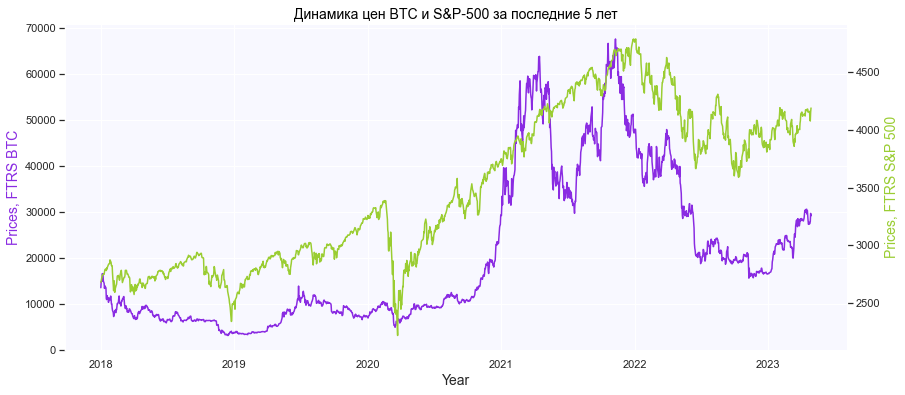

In [390]:
# https://www.dmitrymakarov.ru/data-analysis/eda-04-03/#7-predely-shkaly-i-deleniya-osey-grafika
# https://www.codecamp.ru/blog/matplotlib-two-y-axes/

# используемые цвета
col1 = '#8A2BE2'
col2 = '#9ACD32'

fig,ax = plt.subplots(figsize=(14,6))

# рисуем первый график
ax.plot(df_btc_ftrs['Date'] , df_btc_ftrs['Price'] , color=col1,  linewidth= 1.5 )

#подписываем название оси ОХ
ax.set_xlabel('Year', fontsize= 14 )

#подписываем название оси ОУ для первого объекта
ax.set_ylabel('Prices, FTRS BTC', color=col1, fontsize= 14 )
ax.set_title('Динамика цен BTC и S&P-500 за последние 5 лет', color='black', fontsize= 14 )
# добавляем еще один объект, который будет иметь ту же самую ось ОХ, но другую ось ОУ
ax2 = ax.twinx ()

#рисуем второй график
ax2.plot(df_sp500_ftrs['Date'] , df_sp500_ftrs['Price'] , color=col2, linewidth= 1.5 )

# подписываем название оси ОУ для второго объекта
ax2.set_ylabel('Prices, FTRS S&P 500', color=col2, fontsize= 14 )

ax2.grid(False) # удаляем сетку для второго объекта
ax.set_facecolor('#F8F8FF') # изменить цвет на белый;

#####  Посмотрим на распределение цен двух финансовых инструментов:

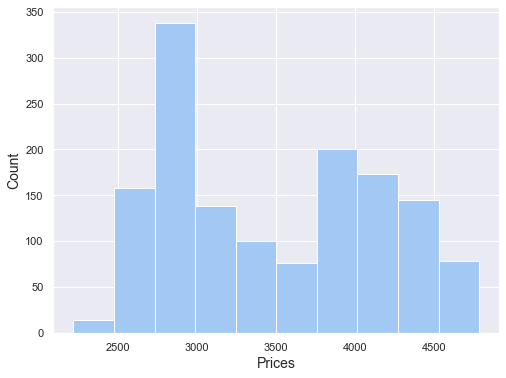

In [388]:
# распределение цен фьючерсов на S&P 500
plt.figure(figsize=(8,6))
df_sp500_ftrs['Price'].hist()
plt.xlabel('Prices', fontsize=14)
plt.ylabel('Count', fontsize=14);

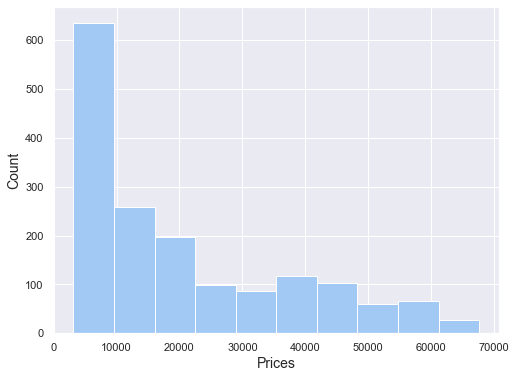

In [389]:
# распределение цен фьючерсов на Bitcoin
plt.figure(figsize=(8,6))
df_btc_ftrs['Price'].hist()
plt.xlabel('Prices', fontsize=14)
plt.ylabel('Count', fontsize=14);

##### Попробуем выяснить, как связаны объем торгов и изменение цен:

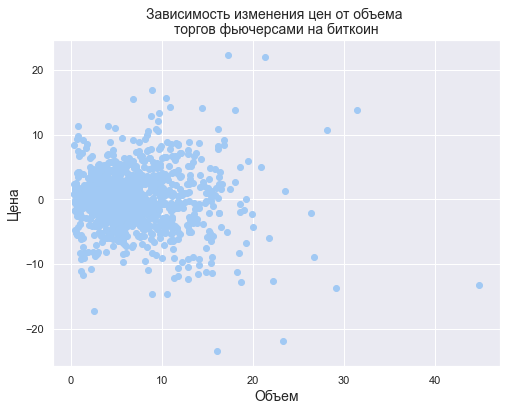

In [345]:
# Scatter plot для фьючерсов на биткоин
plt.figure(figsize=(8,6))
plt.scatter(df_btc_ftrs['Volume, thous.'], df_btc_ftrs['Change, %'])
plt.xlabel('Объем',  fontsize=14)
plt.ylabel('Цена',  fontsize=14)
plt.title('Зависимость изменения цен от объема \nторгов фьючерсами на биткоин',  fontsize=14);

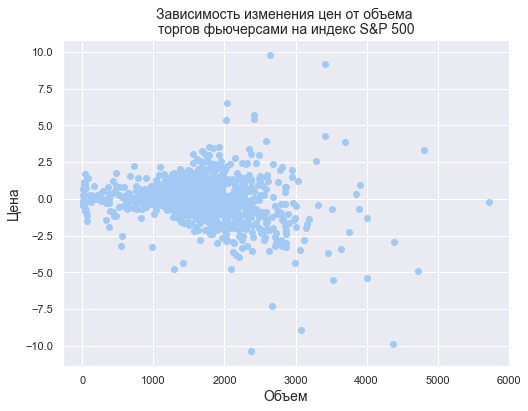

In [346]:
# Scatter plot для фьючерсов на индекс S&P 500
plt.figure(figsize=(8,6))
plt.scatter(df_sp500_ftrs['Volume, thous.'], df_sp500_ftrs['Change, %'])
plt.xlabel('Объем',  fontsize=14)
plt.ylabel('Цена',  fontsize=14)
plt.title('Зависимость изменения цен от объема \nторгов фьючерсами на индекс S&P 500',  fontsize=14);

* *Как видно, четкой взаимосвязи нет, поскольку выбранные финансовые инструменты имеют широкий вторичный рынок, и в среднем рост объема торгов никак не определяет их цены, однако также ярко заметны выбросы, которые, возможно, показывают всплески актиности по тем или иным внешним причинам, которые, как нам кажется, можно рассмотреть на отдельных графиках!*

##### Соотношение объемов и изменения цен, если говорить о фьючерсах на Bitcoin:

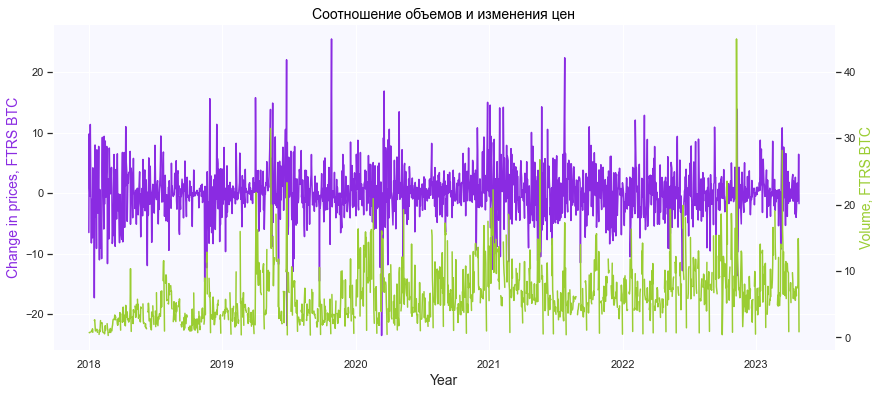

In [379]:
# используемые цвета
col1 = '#8A2BE2'
col2 = '#9ACD32'

fig,ax = plt.subplots(figsize=(14,6))

# рисуем первый график
ax.plot(df_btc_ftrs['Date'] , df_btc_ftrs['Change, %'] , color=col1,  linewidth= 1.5 )

#подписываем название оси ОХ
ax.set_xlabel('Year', fontsize= 14 )

#подписываем название оси ОУ для первого объекта
ax.set_ylabel('Change in prices, FTRS BTC', color=col1, fontsize= 14 )
ax.set_title('Соотношение объемов и изменения цен', color='black', fontsize= 14 )

# добавляем еще один объект, который будет иметь ту же самую ось ОХ, но другую ось ОУ
ax2 = ax.twinx ()

#рисуем второй график
ax2.plot(df_btc_ftrs['Date'] , df_btc_ftrs['Volume, thous.'] , color=col2, linewidth= 1.5 )

# подписываем название оси ОУ для второго объекта
ax2.set_ylabel('Volume, FTRS BTC', color=col2, fontsize= 14 )

ax2.grid(False) # удаляем сетку для второго объекта
ax.set_facecolor('#F8F8FF') # изменить цвет на белый;

In [348]:
# День с наибольшим изменением цены в фьючерсах на биткоин
max_change_day_btc = df_btc_ftrs.loc[df_btc_ftrs['Change, %'].idxmax(), 'Date']

print('День с наибольшим изменением цены в фьючерсах на биткоин:', max_change_day_btc)

День с наибольшим изменением цены в фьючерсах на биткоин: 2019-10-27 00:00:00


##### Соотношение объемов и изменения цен, если говорить о фьючерсах на S&P 500:

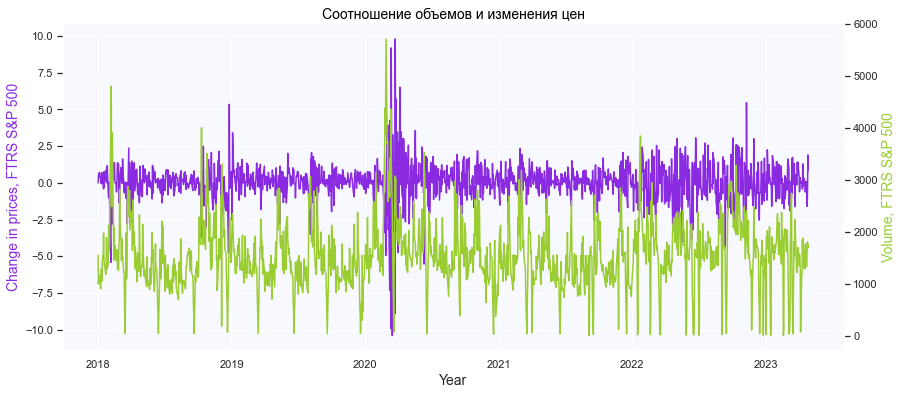

In [380]:
# используемые цвета
col1 = '#8A2BE2'
col2 = '#9ACD32'

fig,ax = plt.subplots(figsize=(14,6))

# рисуем первый график
ax.plot(df_sp500_ftrs['Date'] , df_sp500_ftrs['Change, %'] , color=col1,  linewidth= 1.5 )

#подписываем название оси ОХ
ax.set_xlabel('Year', fontsize= 14 )

#подписываем название оси ОУ для первого объекта
ax.set_ylabel('Change in prices, FTRS S&P 500', color=col1, fontsize= 14 )
ax.set_title('Соотношение объемов и изменения цен', color='black', fontsize= 14 )

# добавляем еще один объект, который будет иметь ту же самую ось ОХ, но другую ось ОУ
ax2 = ax.twinx ()

#рисуем второй график
ax2.plot(df_sp500_ftrs['Date'] , df_sp500_ftrs['Volume, thous.'] , color=col2, linewidth= 1.5 )

# подписываем название оси ОУ для второго объекта
ax2.set_ylabel('Volume, FTRS S&P 500', color=col2, fontsize= 14 )

ax2.grid(False) # удаляем сетку для второго объекта
ax.set_facecolor('#F8F8FF') # изменить цвет на белый;

In [350]:
# День с наибольшим изменением цены в фьючерсах на S&P 500
max_change_day_spx = df_sp500_ftrs.loc[df_sp500_ftrs['Change, %'].idxmax(), 'Date']

print('День с наибольшим изменением цены в фьючерсах на S&P 500:', max_change_day_spx)

День с наибольшим изменением цены в фьючерсах на S&P 500: 2020-03-24 00:00:00


### *Попробуем обнаружить связь между фондовым рынком (через цены фьючерсов на индекс S&P 500) и рынком криптовалют (через цены фьючерсов на Bitcoin):*

In [351]:
df_btc = pd.DataFrame() # пустой датафрейм для дальнейшего заполнения

In [353]:
df_sp500 = pd.DataFrame() # пустой датафрейм для дальнейшего заполнения

In [354]:
df_btc['Date']=df_btc_ftrs['Date']
df_btc['Price']=df_btc_ftrs['Price']

In [355]:
df_sp500['Date']=df_sp500_ftrs['Date']
df_sp500['Price']=df_sp500_ftrs['Price']

In [356]:
df_btc.head() # табличка с ценами фьючерсов на биткоин

,Date,Price
0,2023-04-28,29177.5
1,2023-04-27,29690.0
2,2023-04-26,27900.0
3,2023-04-25,27605.0
4,2023-04-24,27400.0


In [357]:
df_sp500.head() # табличка с ценами фьючерсов на s&p 500

,Date,Price
0,2023-04-28,4188.50
1,2023-04-27,4153.75
2,2023-04-26,4076.00
3,2023-04-25,4093.25
4,2023-04-24,4159.50


***Соединим две таблицы, используя объединение по колонке, что позволит избежать пропусков и, соответственно, не испортит корреляцию:***

In [358]:
df_result = pd.DataFrame() # пустой датафрейм для дальнейшего заполнения

In [359]:
df_result=df_sp500.merge(df_btc, on='Date')

In [360]:
# изменение названий колонок
df_result = df_result.rename(columns={'Price_x': 'Price, FTRS S&P500', 'Price_y': 'Price, FTRS BTC'})

In [361]:
df_result.isnull().sum()

Date                  0
Price, FTRS S&P500    0
Price, FTRS BTC       0
dtype: int64

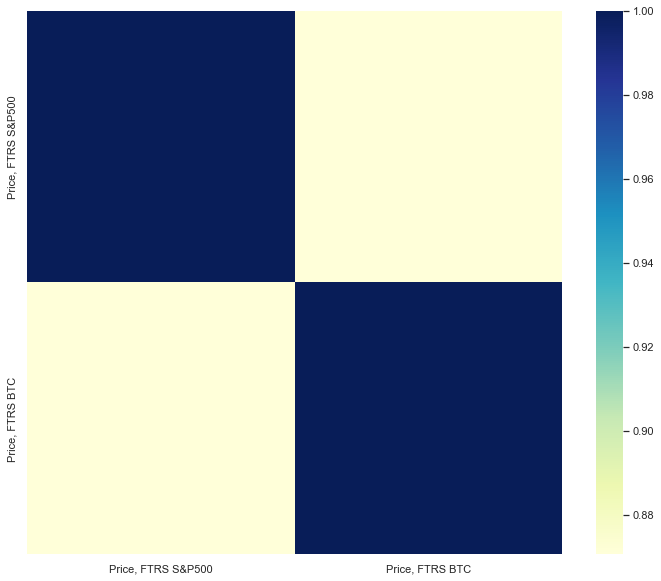

In [362]:
# тепловая карта для корреляционной матрицы цен финансовых инструментов
plt.figure(figsize = (12,10))
matrix_corr=df_result.corr()
sns.heatmap(matrix_corr, cmap='YlGnBu');

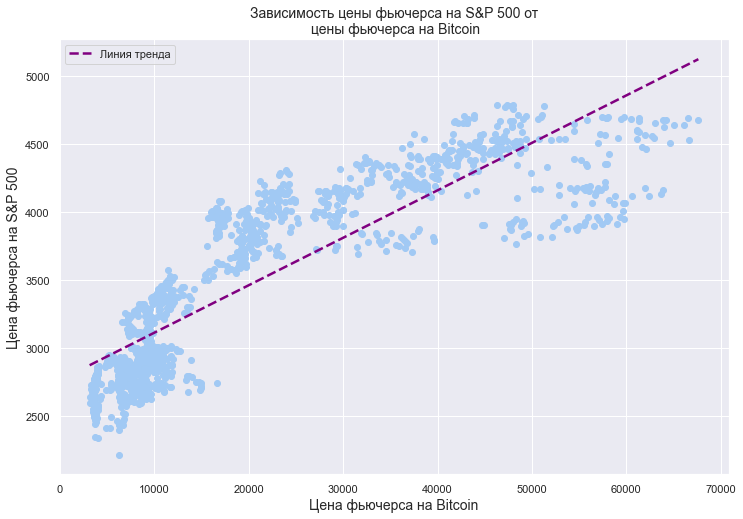

In [363]:
# Зависимость цены фьючерса на S&P 500 от цены фьючерса на Bitcoin
plt.figure(figsize=(12, 8))
plt.scatter(df_result['Price, FTRS BTC'], df_result['Price, FTRS S&P500'])
plt.xlabel('Цена фьючерса на Bitcoin', fontsize= 14)
plt.ylabel('Цена фьючерса на S&P 500', fontsize= 14)
plt.title('Зависимость цены фьючерса на S&P 500 от\n цены фьючерса на Bitcoin', fontsize= 14)

# Добавление линии тренда
# https://www.codecamp.ru/blog/matplotlib-trendline/
coefficients = np.polyfit(df_result['Price, FTRS BTC'], df_result['Price, FTRS S&P500'], 1)
polynomial = np.poly1d(coefficients)
x = np.linspace(df_result['Price, FTRS BTC'].min(), df_result['Price, FTRS BTC'].max(), 100)
plt.plot (x, polynomial(x), color = "purple", linewidth = 2.5 , linestyle = "--", label='Линия тренда')
# Отображение графика
plt.legend();

# Coming Soon...

### *Какие у нас есть гипотезы или что планируем сделать?*

* Цена фьючерса на Биткоин и цена фьючерса на индекс S&P-500 не связаны. Используем для проверки гипотезы линейную регрессию и такой алгоритм машинного обучения, как случайный лес; 
* Объем торгов фьючерса на Биткоин и объем торгов фьючерса на S&P 500 не связаны. Используем для проверки гипотезы линейную регрессию и такой алгоритм машинного обучения, как случайный лес;
* В дальнейшем создаем переменную "Volatility" для каждого из рассматриваемых инструментов, в которой будет произведена классификация на "low", "high", "medium". H0 состоит в том, что по состоянию фондового рынка нельзя определить, как ведет себя рынок криптовалют. Использовать методы будем скорее всего те же, что и в предыдущих пунктах;